<a href="https://colab.research.google.com/github/Leonardo8Cos/Real-Estate-/blob/main/RealEstate1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import requests
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

#%matplotlib inline   #https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#With this procedure i import from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Import the data from Drive

HERE I IMPORT THE TRAIN


In [12]:
#https://drive.google.com/file/d/1Vua-9k9n8MojHvlQYf7zQoUVMCsxVjCs/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1Vua-9k9n8MojHvlQYf7zQoUVMCsxVjCs'})
fileDownloaded.GetContentFile('train.csv')
import pandas as pd
TTrain = pd.read_csv('train.csv', delimiter=',' )
TTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


HERE I IMPORT TEST

In [13]:
#https://drive.google.com/file/d/1xwt-9B-CL9sp6e5m1ukvuUwmMBolPhws/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1xwt-9B-CL9sp6e5m1ukvuUwmMBolPhws'})
fileDownloaded.GetContentFile('test.csv')
import pandas as pd
TTest = pd.read_csv('test.csv', delimiter=',' )
TTest
#------------------------------------------------------------------------
#https://drive.google.com/file/d/1Dk9T8UveZkSa4HOGdCl1XPDzOlprBYUu/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1Dk9T8UveZkSa4HOGdCl1XPDzOlprBYUu'})
fileDownloaded.GetContentFile('sample_submission.csv')
import pandas as pd
yttest = pd.read_csv('sample_submission.csv', delimiter=',' )
TTest= TTest.merge(yttest, on='Id')
yttest.shape

(1459, 2)

In [14]:
TTest.shape


(1459, 81)

In [15]:
TTrain
#TTest=Test
TTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In the test dataset i don't have the y so i add it 

In [ ]:
#TTest= pd.concat([TTest, yttest], axis=1)

#TTest= TTest.merge(yttest, on='Id')


In [16]:
TTest.shape

(1459, 81)

In [ ]:
#TTest.info()

#I merge the two dataset

In [17]:
frames = [TTrain, TTest]
Datatot = pd.concat(frames)

In [18]:
Datatot

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


# Trasform the qualitative variables in quantitative variables 

Quantitative: MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1,
 Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual,
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC,
   CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition

   Utili: LandSlope*, ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, CentralAir, KitchenQual, GarageCond*, PavedDrive, PoolQC(dummy)

Neighborhood -> the neighborhood is very important but i need to use dummies. At the end i will do it

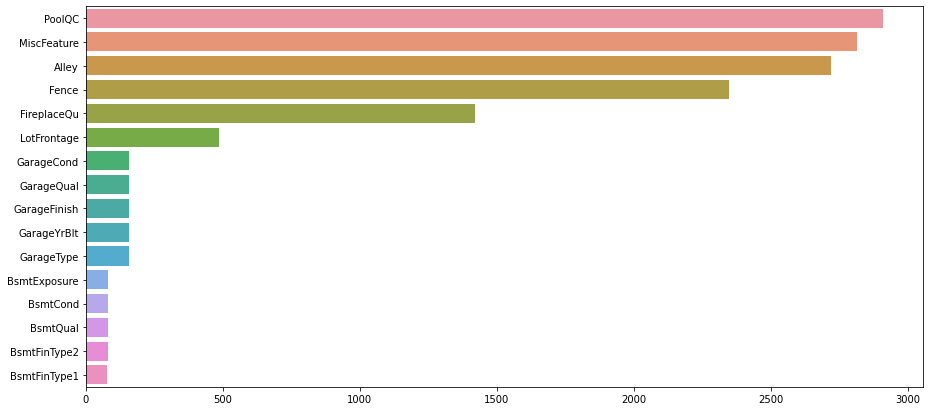

In [ ]:
# L'idea è che alcune variabili con valori NaN in realtà sono solo pensate male, perchè NaN vuol dire "0" o "Assente"
fig=plt.figure(figsize=(15,7))
train_null=Datatot.isnull().sum()[Datatot.isnull().sum()>50].sort_values(ascending=False)
sns.barplot(y=train_null.index,x=train_null)

##Label encoder

In [19]:
Datatot["KitchenAbvGr"].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

Substitute non numerical varibles: 

In [20]:
cleanup_nums = {"ExterQual":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                
                "LandSlope":     {"Sev": 0, "Mod": 1, "Gtl": 2},
                    
                "ExterCond":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "BsmtQual":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                                 
                "BsmtCond":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "HeatingQC":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "CentralAir":    {"N": 0, "Y": 1},

                "KitchenQual":   {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "GarageCond":    {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "PavedDrive":    {"N": 0, "P": 1, "Y": 2},

                "PoolQC":        {"Fa": 1, "TA": 1, "Gd": 1, "Ex": 1 } }

In [21]:
Datatot = Datatot.replace(cleanup_nums)
Datatot.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [24]:
#from statistics import mode 
#mode(Datatot['SalePrice'])
np.mean(Datatot['SalePrice'])

180052.85464749733

In [25]:
Datatot['PoolQC'] = Datatot['PoolQC'].fillna(0)

In [26]:
#Serve per la sezione con i quartieri
Datatest=Datatot

# Work with NAN

In [27]:
count_nan = Datatot.isnull().sum().sort_values(ascending=False) # the number of missing values for every column
percent = ((Datatot.isnull().sum()/Datatot.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([count_nan, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
MiscFeature,2814,96.403
Alley,2721,93.217
Fence,2348,80.439
FireplaceQu,1420,48.647
LotFrontage,486,16.650
GarageFinish,159,5.447
GarageQual,159,5.447
GarageCond,159,5.447
GarageYrBlt,159,5.447
GarageType,157,5.379


Dropping columns with too many NAN (>100): Alley, FireplaceQu, PoolQC, Fance, MiscFeature     
             

In [28]:
Datatot.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageYrBlt' ,'GarageFinish' , 'GarageQual'], axis = 1, inplace = True)
#check how many values are missing (NaN) - after we dropped 'bmi'
count_nan = Datatot.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageCars        1
GarageArea        1
GarageCond      159
SaleType          1
dtype: int64


Dropping the records (observations) with NAN values 

In [29]:
Datatot.dropna(inplace=True)
Datatot.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = Datatot.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan < 0])


Series([], dtype: int64)


In [ ]:
#Datatot.info(5)

## Preliminary analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


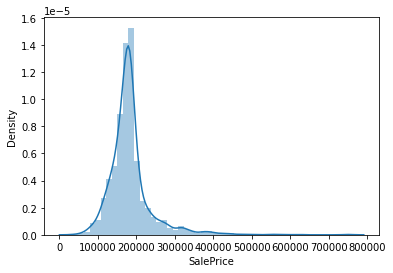

In [30]:
#histogram
sns.distplot(Datatot['SalePrice']);
#codici pe aggiungere media e mediana in due diversi colori, cambia dimensioni

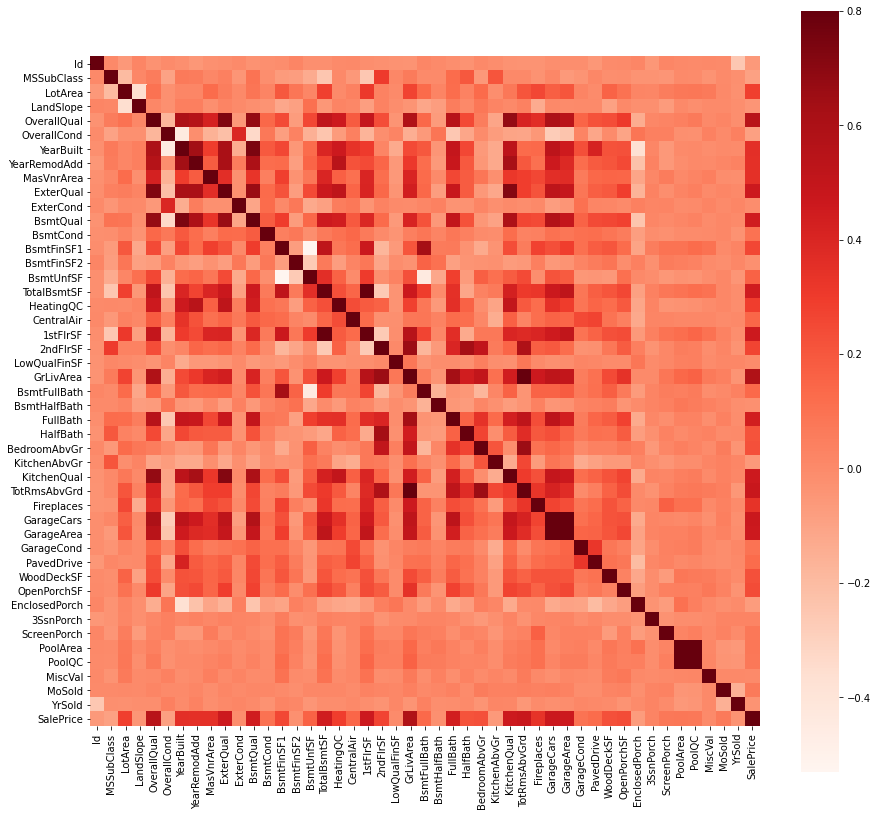

In [ ]:
#Correlation Graph
corrmat = Datatot.corr()
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Reds');

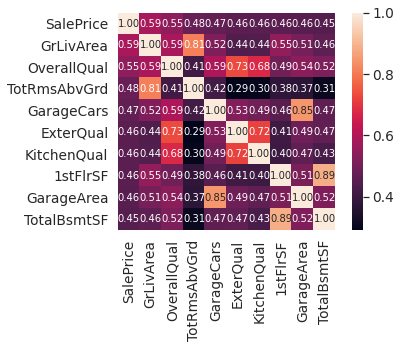

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(Datatot[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

3 possible causes of multicollinearity:
TotRmsAbvGrd with GrLivArea, drop-> TotRmsAbvGrd

*   TotRmsAbvGrd with GrLivArea, drop-> TotRmsAbvGrd
*   GarageCars with GareageArea, drop-> GareageArea
*   TotalBsmtSF with 1stFlrSF, drop-> TotalBsmtSF


In [ ]:
#scatterplot
'''sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(Datatot[cols], size = 4.5)
plt.show();'''

"sns.set()\ncols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']\nsns.pairplot(Datatot[cols], size = 4.5)\nplt.show();"

## Drop non numerical variables 

DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields: 
MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition.

In [ ]:
'''MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1,
 Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual,
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC,
   CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition'''
#Volendo tenere le variabili numeriche originali 
'''Datatot.drop(['MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)'''

"Datatot.drop(['MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',\n'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',\n'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)"

In [31]:
#Teniamo le variabili che abbiamo convertito da qualitative a quantitative
#Variabili da tenere: 'TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageCond', 'PavedDrive', 'PoolQC'
Datatot.drop(['Id', 'MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'Electrical','Functional','SaleType','SaleCondition','TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'],axis=1,inplace=True) 

#Variabili da cancellare per la multicollinearità: ,'KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF'
Datatot.drop(['YrSold', 'YearBuilt', '2ndFlrSF','LowQualFinSF'],axis=1,inplace=True) 

In [ ]:
#list(Datatot.columns.values) 

## Outlier

In [32]:
corr_matrix = Datatot.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False).head(10))

SalePrice     1.000
GrLivArea     0.587
OverallQual   0.548
GarageCars    0.471
ExterQual     0.462
KitchenQual   0.460
1stFlrSF      0.458
BsmtQual      0.447
FullBath      0.438
MasVnrArea    0.349
Name: SalePrice, dtype: float64


In [33]:
Dtot=Datatot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

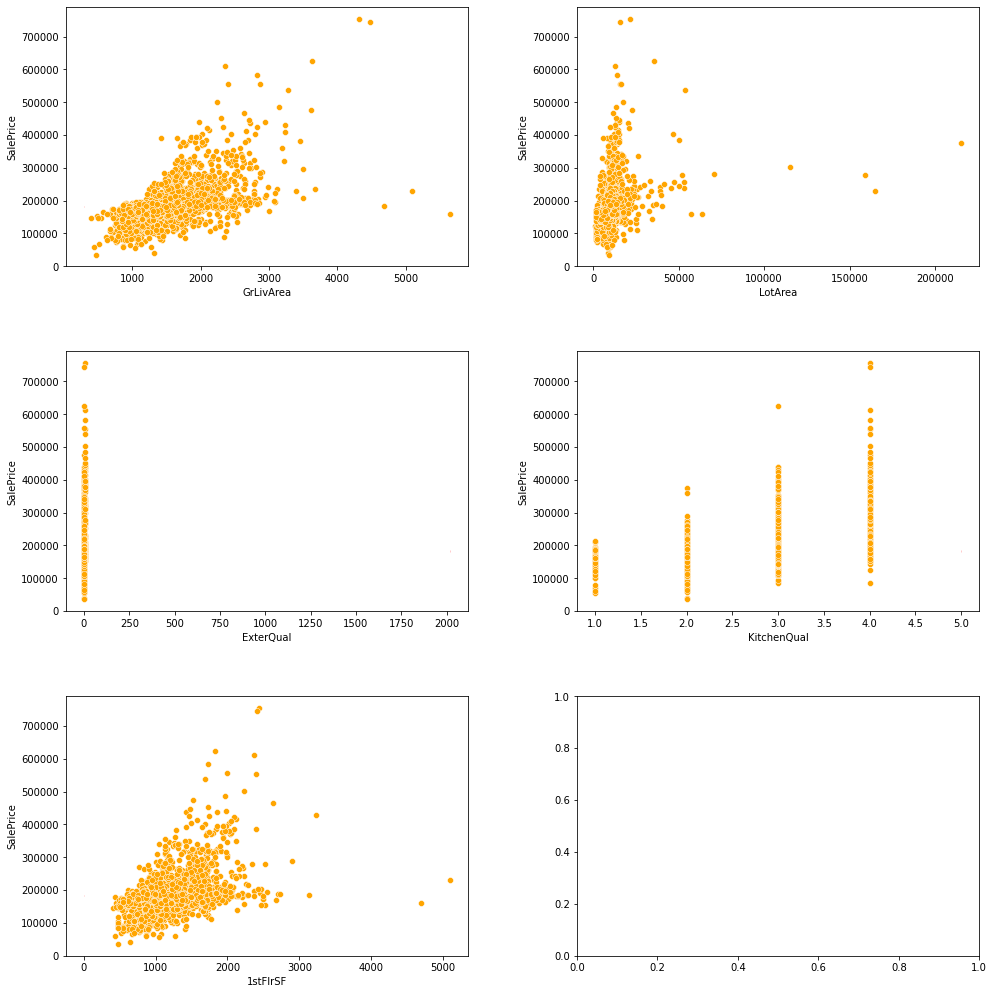

In [35]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
def graph(x,y,r,c,title,line):
    sns.scatterplot(Dtot[x],Dtot[y],color=('orange'),ax=ax[r][c])
    sns.lineplot(x=line,y=Dtot[y],color='red',ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out=[300,1111,2018,5,5,4000]
for r,col in enumerate(np.array(['GrLivArea','LotArea','ExterQual','KitchenQual','1stFlrSF'])):
    c=r%2
    graph(col,'SalePrice', r//2 ,c ,col , out[r])

In [36]:
Dtot['SalePrice'].sort_values(ascending=False).head(15)

632    755000.000
1081   745000.000
1070   625000.000
826    611657.000
736    582933.000
955    556581.000
402    555000.000
704    538000.000
160    501837.000
731    485000.000
166    475000.000
1257   466500.000
541    451950.000
485    446261.000
433    440000.000
Name: SalePrice, dtype: float64

In [37]:
#Elimino manualmente tre outlier di y
i1=Dtot['SalePrice'].sort_values(ascending=False).head(3).index
Dtot.drop(i1, axis=0, inplace=True)

In [38]:
#Elimino manualmente tre outlier di X=GrLivArea
i2=Dtot['GrLivArea'].sort_values(ascending=False).head(3).index
Dtot.drop(i2, axis=0, inplace=True)

#Elimino manualmente tre outlier di X=LotArea
i3=Dtot['LotArea'].sort_values(ascending=False).head(4).index
Dtot.drop(i3, axis=0, inplace=True)

This part shows us the percentile of one specific varible x:

In [39]:
out=[]
def Winsorization_outliers(Dtot):
    q1 = np.percentile(Dtot , 1)
    q3 = np.percentile(Dtot , 99)
    for i in Dtot:
        if i > q3 or i < q1:

            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(Dtot['GrLivArea'])

Outliers: [520, 2945, 747, 3222, 3608, 3112, 3493, 2978, 720, 672, 694, 630, 3228, 3194, 616, 3279, 3140, 480, 747, 2872, 691, 2898, 3082, 630, 2868, 438, 2872, 672, 3447, 3238, 540, 3005, 725, 732, 704, 572, 2840, 2944, 672, 672, 407, 2956, 3078, 3086, 3390, 2855, 3500, 713, 715, 720, 492, 3672, 498, 641]


In [10]:
#Dtot['GrLivArea'].drop(out, axis=0)
#i_o=out.index
#Dtot.drop(i_o, axis=0, inplace=True)


# Multicollinearity



In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Datatot.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Datatot.values, i)
                          for i in range(len(Datatot.columns))]
  
#print(vif_data)

In [41]:
print(vif_data.sort_values('VIF',ascending=False).head(150))

          feature     VIF
5    YearRemodAdd 353.557
27     GarageCond  89.411
3     OverallQual  80.403
2       LandSlope  73.503
16       1stFlrSF  69.676
17      GrLivArea  59.768
7       ExterQual  59.617
10       BsmtCond  57.980
23   KitchenAbvGr  50.816
4     OverallCond  44.951
8       ExterCond  44.385
9        BsmtQual  41.912
24    KitchenQual  40.681
22   BedroomAbvGr  29.055
15     CentralAir  28.608
28     PavedDrive  24.367
38      SalePrice  24.311
20       FullBath  23.307
13      BsmtUnfSF  20.896
14      HeatingQC  20.035
26     GarageCars  19.233
11     BsmtFinSF1  17.597
1         LotArea   7.857
37         MoSold   6.407
0      MSSubClass   4.445
34       PoolArea   4.286
35         PoolQC   4.250
18   BsmtFullBath   3.708
21       HalfBath   3.319
25     Fireplaces   2.940
12     BsmtFinSF2   2.433
29     WoodDeckSF   1.947
30    OpenPorchSF   1.870
6      MasVnrArea   1.868
31  EnclosedPorch   1.329
19   BsmtHalfBath   1.248
33    ScreenPorch   1.194
32      3Ssn

In [42]:
temp_pca = pd.DataFrame()
temp_pca = Datatot[['BsmtCond','ExterQual','ExterCond', 'HeatingQC','OverallQual','OverallCond','YearRemodAdd' ]]

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(temp_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])


In [44]:
pca.explained_variance_ratio_

array([0.99205304])

##Split the datset in Train e Test


In [45]:
Dtot=Datatot
#Dtot.info()

In [46]:
from sklearn.model_selection import train_test_split
X, y = Dtot.iloc[: , :-1], Dtot.iloc[:,-1]


Return two array

In [47]:
len(y), len(X)

(2647, 2647)

In [ ]:
'''X_train,X_test, y_train,y_test=\
  train_test_split(X,y, 
                   test_size=0.3, 
                   random_state=0,
                   stratify=y)
'''                   

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=420)

##XGBoost

In [ ]:
#need to scale in case we want to use linear models
'''Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))'''

In [49]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=4,learning_rate=0.003,n_estimators=2000,reg_alpha=0.01,reg_lambda=0.0001,n_jobs=-1,min_child_weight=1)
XGB.fit(X_train,y_train)
#print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))

[11:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.003, max_depth=4, n_estimators=2000, n_jobs=-1,
             reg_alpha=0.01, reg_lambda=0.0001)

In [50]:
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))

Training score: 0.7696586387807076 Test Score: 0.5307756920959237


In [51]:
#y predette
y_pred_xgb  = pd.DataFrame( XGB.predict(X_test))
#y_pred_xgb
y_real= (y_test[:,np.newaxis])
#Calcolo RootMeanSquaredError
MSE = np.square(np.subtract(y_real,y_pred_xgb)).mean()

RMSE = math.sqrt(MSE)
print('il RMSE è: %s' %RMSE)

il RMSE è: 36183.93239616888


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


## Tuning of XGBOOST

In [52]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.004, 0.003], 'max_depth': [1,2], 'n_estimators': [2500, 2000],'min_child_weight': [3,4],'n_jobs': [-1]}

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =-1)
xgbr_reg.fit(X_train,y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_val_pred_x))))

[11:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best params:{'learning_rate': 0.003, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 2500, 'n_jobs': -1}
Root Mean Square Error train = 35136.161419717886
Root Mean Square Error test = 35690.29903397116


##Random Forest

In [53]:

rf = RandomForestRegressor()
params = {"max_depth":[25,30,27], "n_estimators":[35]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RandomForestRegressor(max_depth=30, n_estimators=35)
Root Mean Square Error train = 16379.528328282388
Root Mean Square Error test = 36140.89143150519


RMSE (XGBOOST) -> 35690    
RMSE (Random Forest) -> 36140             
XGBOOST is the best model

In [54]:
r2_score(y_pred_test, y_test) ,r2_score(y_pred_train, y_train)

(0.16215629474401472, 0.8709859013758148)

In [55]:
#rf_reg.score(X_test, y_test)
rf_reg.score(X_train, y_train)

0.9108126765745623

## Add the neighborhoods

In [56]:
frames = [TTrain, TTest]
Datatot = pd.concat(frames)
cleanup_nums = {"ExterQual":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "LandSlope":     {"Sev": 0, "Mod": 1, "Gtl": 2},    
                "ExterCond":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "BsmtQual":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},                                 
                "BsmtCond":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "HeatingQC":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "CentralAir":    {"N": 0, "Y": 1},
                "KitchenQual":   {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "GarageCond":    {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "PavedDrive":    {"N": 0, "P": 1, "Y": 2},
                "PoolQC":        {"Fa": 1, "TA": 1, "Gd": 1, "Ex": 1 } }
Datatot = Datatot.replace(cleanup_nums)
Datatot['PoolQC'] = Datatot['PoolQC'].fillna(0)
Datatest=Datatot
District= pd.get_dummies(Datatest, prefix='' , prefix_sep='',drop_first=True, columns=['Neighborhood']) 

In [ ]:
#District

In [57]:
District.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageYrBlt' ,'GarageFinish' , 'GarageQual'], axis = 1, inplace = True)

District.dropna(inplace=True)
District.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = District.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan < 0])

District.drop(['Id', 'MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'Electrical','Functional','SaleType','SaleCondition','TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'],axis=1,inplace=True) 
District.reset_index(drop=True, inplace=True)

#Variabili da cancellare per la multicollinearità:'LowQualFinSF','KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF','LandSlope'
District.drop(['YrSold', 'YearBuilt', '2ndFlrSF','LowQualFinSF','KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF'],axis=1,inplace=True) 
District.reset_index(drop=True, inplace=True)

Series([], dtype: int64)


In [58]:
Dist=District
Dist.head()

,MSSubClass,LotArea,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,60,8450,2,5,196.000,3,2,3.000,2.000,706.000,...,0,0,0,0,0,0,0,0,0,0
1,20,9600,2,8,0.000,2,2,3.000,2.000,978.000,...,0,0,0,0,0,0,0,0,0,1
2,60,11250,2,5,162.000,3,2,3.000,2.000,486.000,...,0,0,0,0,0,0,0,0,0,0
3,70,9550,2,5,0.000,2,2,2.000,3.000,216.000,...,0,0,0,0,0,0,0,0,0,0
4,60,14260,2,5,350.000,3,2,3.000,2.000,655.000,...,1,0,0,0,0,0,0,0,0,0


In [59]:
corr_matrix = Dist.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False).head(10))

SalePrice     1.000
GrLivArea     0.587
GarageCars    0.471
ExterQual     0.462
KitchenQual   0.460
BsmtQual      0.447
FullBath      0.438
MasVnrArea    0.349
Fireplaces    0.342
HeatingQC     0.294
Name: SalePrice, dtype: float64


In [60]:

from sklearn.model_selection import train_test_split
XX, yy = Dist.iloc[: , :-1], Dist["SalePrice"]
XX_train, XX_test, yy_train, yy_test = train_test_split(
    XX, yy, test_size=0.30, random_state=420)

In [61]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=6,learning_rate=0.01,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(XX_train,yy_train)

[11:18:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=6, min_child_weight=3,
             n_estimators=1000, n_jobs=-1, reg_alpha=0.001, reg_lambda=1e-06)

In [62]:
XX_train.head()

,MSSubClass,LotArea,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,...,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber
654,20,10140,2,5,174.000,2,2,3.000,2.000,0.000,...,1,0,0,0,0,0,0,0,0,0
2372,160,1890,2,3,0.000,2,2,2.000,2.000,0.000,...,0,0,0,0,0,0,0,0,0,0
2421,60,13975,2,5,525.000,3,2,3.000,2.000,0.000,...,0,0,1,0,0,0,0,0,0,0
1374,160,3215,2,5,120.000,3,2,3.000,2.000,280.000,...,0,0,0,0,0,0,0,1,0,0
790,60,11029,2,7,220.000,2,2,2.000,2.000,619.000,...,1,0,0,0,0,0,0,0,0,0


In [63]:
print ("Training score:",XGB.score(XX_train,yy_train),"Test Score:",XGB.score(XX_test,yy_test))

Training score: 0.9999653969616179 Test Score: 0.9982628427428296


In [65]:
#y hat
yy_pred_xgb  = pd.DataFrame( XGB.predict(XX_test))
#y_pred_xgb
yy_real= (yy_test[:,np.newaxis])
#Compute RootMeanSquaredError
MSE = np.square(np.subtract(yy_real,yy_pred_xgb)).mean()

RMSE = math.sqrt(MSE)
print('the RMSE is: %s' %RMSE)

the RMSE is: 2459.7257224165996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


Random Forest on dataset with neighborhoods

In [66]:
rf = RandomForestRegressor()
params = {"max_depth":[22,20,21], "n_estimators":[30]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(XX_train, yy_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
yy_pred_train = best_estimator.predict(XX_train)
yy_pred_test = best_estimator.predict(XX_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(yy_train, yy_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(yy_test, yy_pred_test))))

RandomForestRegressor(max_depth=22, n_estimators=30)
Root Mean Square Error train = 1895.9189517086245
Root Mean Square Error test = 2546.398055869187


In [67]:
rf_reg.score(XX_train, yy_train) , rf_reg.score(XX_test, yy_test)

(0.9988686251656527, 0.9981382628818045)